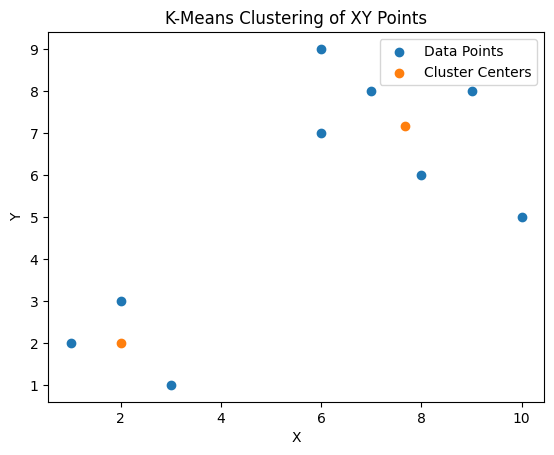

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = np.array([[1, 2], [2, 3], [3, 1], [6, 7], [7, 8], [8, 6], [9, 8], [10, 5], [6, 9]])
kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(data)

labels = kmeans.predict(data)

centers = kmeans.cluster_centers_

plt.scatter(data[:,0],data[:,1], label='Data Points')
plt.scatter(centers[:,0],centers[:,1], label='Cluster Centers')

plt.title('K-Means Clustering of XY Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

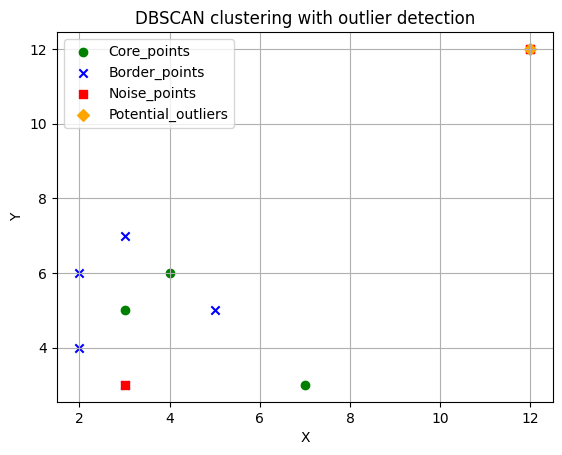

In [11]:
#outlier detection using dbscan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

data=np.array([[3,7], [4, 6], [5, 5], [6, 4], [7, 3], 
                 [6, 2], [7, 2], [8, 4], [3, 3], 
                 [2, 6], [3, 5], [2, 4], [12,12]])

dbscan=DBSCAN(eps=1.9, min_samples=4)

dbscan.fit(data)

labels=dbscan.labels_

core_sample_indices=dbscan.core_sample_indices_

core_points=data[core_sample_indices]
border_points=data[(labels!=1) & (~np.isin(np.arange(len(data)),core_sample_indices))]
noise_points=data[labels==-1]

nbrs=NearestNeighbors(n_neighbors=1).fit(core_points)
distances, indices = nbrs.kneighbors(data)

distance_threshold = 3.0

potential_outliers = data[distances.flatten() > distance_threshold]

#plt.figure(figsize=(10,8))
plt.scatter(core_points[:,0], core_points[:,1], color='green', marker='o', label='Core_points')
plt.scatter(border_points[:,0], border_points[:,1], color='blue', marker='x', label='Border_points')
plt.scatter(noise_points[:,0], noise_points[:,1], color='red', marker='s', label='Noise_points')
plt.scatter(potential_outliers[:,0], potential_outliers[:,1], color='orange', marker='D', label='Potential_outliers')

plt.title('DBSCAN clustering with outlier detection')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()


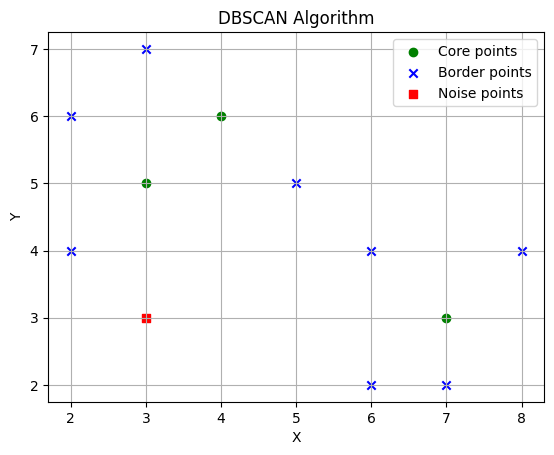

In [14]:
#dbscan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

data=np.array([[3, 7], [4, 6], [5, 5], [6, 4], [7, 3], 
                 [6, 2], [7, 2], [8, 4], [3, 3], 
                 [2, 6], [3, 5], [2, 4]])

dbscan=DBSCAN(eps=1.9, min_samples=4)

dbscan.fit(data)

labels=dbscan.labels_

core_sample_indices=dbscan.core_sample_indices_

core_points = data[core_sample_indices]
border_points = data[(labels!=-1) & (~np.isin(np.arange(len(data)), core_sample_indices))]
noise_points = data[labels == -1]

plt.scatter(core_points[:,0], core_points[:,1], color='green', marker='o', label='Core points')
plt.scatter(border_points[:,0], border_points[:,1], color='blue', marker='x', label='Border points')
plt.scatter(noise_points[:,0], noise_points[:,1], color='red', marker='s', label='Noise points')

plt.legend()
plt.title('DBSCAN Algorithm')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()


In [20]:
#apriori based recurrence checker

import networkx as nx
from collections import defaultdict
from itertools import combinations

def create_graph_dataset():
    G1=nx.Graph()
    G1.add_edges_from([(1,2), (1,3), (2,3), (2,4)])
    G2 = nx.Graph()
    G2.add_edges_from([(1, 2), (1, 3), (2, 4), (4, 5)])
    G3 = nx.Graph()
    G3.add_edges_from([(1, 2), (1, 3), (3, 4), (4, 5), (5, 6)])
    return [G1, G2, G3]

def is_subgraph_isomorphic(G, H):
    Gm=nx.algorithms.isomorphism.GraphMatcher(G, H)
    return Gm.subgraph_is_isomorphic()

def find_candidate_subgraphs(graphs, k):
    candidates=defaultdict(int)
    for G in graphs:
        nodes = list(G.nodes())
        for comb in combinations(nodes, k):
            subgraph = G.subgraph(comb)
            for graph in graphs:
                if is_subgraph_isomorphic(graph, subgraph):
                    candidates[tuple(sorted(comb))] += 1
    return candidates

def apriori_mining(graphs, min_support=2):
    frequent_subgraphs = []
    k=2
    while True:
        candidates = find_candidate_subgraphs(graphs, k)
        frequent = {subgraph: support for subgraph, support in candidates.items() if support >= min_support}
        if not frequent:
            break
        frequent_subgraphs.append(frequent)
        k+=1
    return frequent_subgraphs

if __name__=="__main__":
    graphs = create_graph_dataset()
    frequent_subgraphs = apriori_mining(graphs, min_support=2)
    for level, subgraphs in enumerate(frequent_subgraphs):
        print(f"Frequent Subgraphs of size {level+2}:")
        for subgraph, support in subgraphs.items():
            print(f"Subgraph {subgraph}, Support: {support}")
        
        

Frequent Subgraphs of size 2:
Subgraph (1, 2), Support: 9
Subgraph (1, 3), Support: 9
Subgraph (1, 4), Support: 9
Subgraph (2, 3), Support: 9
Subgraph (2, 4), Support: 9
Subgraph (3, 4), Support: 9
Subgraph (1, 5), Support: 6
Subgraph (2, 5), Support: 6
Subgraph (3, 5), Support: 6
Subgraph (4, 5), Support: 6
Subgraph (1, 6), Support: 3
Subgraph (2, 6), Support: 3
Subgraph (3, 6), Support: 3
Subgraph (4, 6), Support: 3
Subgraph (5, 6), Support: 3
Frequent Subgraphs of size 3:
Subgraph (1, 2, 3), Support: 7
Subgraph (1, 2, 4), Support: 9
Subgraph (1, 3, 4), Support: 9
Subgraph (2, 3, 4), Support: 9
Subgraph (1, 2, 5), Support: 6
Subgraph (1, 3, 5), Support: 6
Subgraph (1, 4, 5), Support: 6
Subgraph (2, 3, 5), Support: 4
Subgraph (2, 4, 5), Support: 6
Subgraph (3, 4, 5), Support: 6
Subgraph (1, 2, 6), Support: 3
Subgraph (1, 3, 6), Support: 3
Subgraph (1, 4, 6), Support: 2
Subgraph (1, 5, 6), Support: 3
Subgraph (2, 3, 6), Support: 2
Subgraph (2, 4, 6), Support: 2
Subgraph (2, 5, 6), Supp

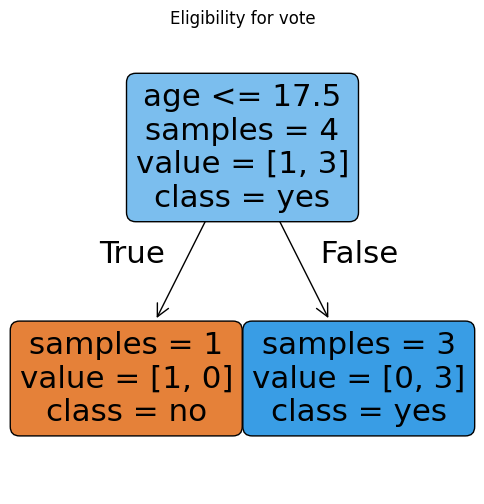

enter age: 18


result:yes


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree

data = {
    'name':['moka','krishna,','prasad','bhavani'],
    'age': [17,22,19,18],
    'can_vote': ['no','yes','yes','yes']
}
df = pd.DataFrame(data)

X = df[['age']]
y = df['can_vote']

clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X,y)

plt.figure(figsize=(6,6))
plot_tree(clf,feature_names=['age'],class_names=['no','yes'],rounded=True,filled=True,impurity=False)
plt.title("Eligibility for vote")
plt.show()

def DTC(age):
    X_pred = pd.DataFrame({'age':[age]})
    prediction = clf.predict(X_pred)
    return prediction[0]

user_input = int(input("enter age:"))
result = DTC(user_input)
print(f"result:{result}")

In [24]:
### import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample dataset
data = {
    'Age': [25, 45, 35, 50, 23, 34, 67, 28, 42, 36],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male'],
    'Buys': ['No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode categorical variables (Gender, Buys)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male = 1, Female = 0
df['Buys'] = label_encoder.fit_transform(df['Buys'])      # Yes = 1, No = 0

# Define features (X) and target (y)
X = df[['Age', 'Gender']]
y = df['Buys']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Output the accuracy and predictions
print("Predictions:", y_pred)
print("Accuracy:", accuracy)

Predictions: [1 1 0]
Accuracy: 0.6666666666666666
